# <b style='color:magenta;'> Log Reg </b>
* Este Jupyter tem como função treinar uma `Regessão Logística` com os melhores parametros determinados por um `RandomSearch`.

-> Dataset completo com voluntários femininos e masculinos, sem outliers e sem a coluna de semanas e com pca.

---

Bibliotecas/Módulos

In [1]:
import logging
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle as pkl
import seaborn as sns
import sys

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, average_precision_score, accuracy_score, matthews_corrcoef, classification_report, confusion_matrix, f1_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.model_selection import train_test_split

Configurações dos logs

In [2]:
logger = logging.getLogger("LogReg")
logger.setLevel(logging.DEBUG)
handler = logging.StreamHandler(sys.stderr)
formatter = logging.Formatter('%(name)s - %(levelname)s - [+] ------- %(message)s -------') 
handler.setFormatter(formatter)
logger.handlers = [handler]

Cores

In [3]:
RED = "\033[1;31m"
BLUE = "\033[1;34m"
GREEN = "\033[1;32m"
PINK = "\033[1;45m"
HEADER = '\033[95m'
OKBLUE = '\033[94m'
OKCYAN = '\033[96m'
OKGREEN = '\033[92m'
WARNING = '\033[93m'
FAIL = '\033[91m'
ENDC = '\033[0m'
BOLD = '\033[1m'
UNDERLINE = '\033[4m'
MAG = "\033[1;45m"

---

In [4]:
df = pd.read_csv("dados/dados_FEM_MAS_10_voluntarios_s_semanas_15_sinais_noout.csv")

In [5]:
df.sample()

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,label
21137,5,2,2,6,3,4,3,5,3,3,...,3,2,3,4,5,3,3,5,3,1


Verificando tamanho do dataset

In [6]:
len(df)

25200

Verificando a quantidade de colunas originais

In [7]:
len(df.columns)

2001

* Seleção da variável target e das features

In [8]:
y = df["label"]

In [9]:
df = df.drop(["label"], axis=1)

#### PCA
Aplicando o PCA para reduzir a dimensão dos dados.

In [10]:
pca = PCA(n_components=1000)

In [11]:
pca.fit(df)

PCA(n_components=1000)

In [12]:
%%time

pca_samples = pca.transform(df)

CPU times: user 19.5 s, sys: 1.43 s, total: 20.9 s
Wall time: 1.62 s


In [13]:
ps = pd.DataFrame(pca_samples)
ps.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-35.068197,23.928768,1.186254,-151.129527,-42.556784,-148.023683,-53.831397,-28.461750,-41.857889,-104.510884,...,-20.185911,-54.703846,19.065712,-41.606647,14.064979,43.776326,-47.717873,-71.118814,52.784548,8.549779
1,-69.680457,36.845880,47.351802,-121.842658,-24.717552,-113.801059,-37.514149,-47.755131,-13.947044,-92.122796,...,-22.408870,-55.416995,25.558712,-29.078949,-6.947691,33.214213,-33.721565,-64.516346,27.890401,10.617190
2,-94.676600,38.038653,98.432548,-103.621516,-10.274245,-71.540178,-15.104704,-53.717266,24.066586,-97.600882,...,-12.580321,-57.554781,26.004036,-22.099001,-19.011272,30.213263,-15.947640,-52.063792,11.978697,20.185654
3,-115.288910,36.334428,137.247898,-70.874058,-8.118221,-44.962368,-3.156064,-64.584880,46.295866,-89.627326,...,-12.988076,-55.796746,38.375000,-7.088687,-22.405300,3.429365,10.325868,-27.203207,4.718532,18.270115
4,-111.539509,45.575378,158.235942,-48.798876,-3.696119,-8.481742,11.270159,-71.759108,48.659401,-69.601917,...,-18.640550,-49.475646,45.969980,10.017216,-29.854329,-12.700807,6.184660,-11.226529,-23.475311,18.417871


In [14]:
len(ps)

25200

In [15]:
len(ps.columns)

1000

In [16]:
X = ps

Separando os dados em dados de treino e teste

In [17]:
x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=7)

----

## Treinamento

### Regressão Logística

Parametros do modelo escolhidos para otimização

In [18]:
values = {'C':[1, 10, 100], 'solver':['newton-cg', 'liblinear', 'sag', 'lbfgs']}

In [19]:
clf = LogisticRegression()

In [20]:
from modules.best_params import best_params

In [21]:
%%time

try:
    best = best_params(values, clf, x_treino, x_teste, y_treino, y_teste)

except Exception as error:
    logger.warning('Aconteceu algum problema...')
    logger.critical(error)

else:
    logger.info('Ok')
    
finally:
    logger.info('Busca finalizada')

LogReg - INFO - [+] ------- Instanciando Kmeans -------
LogReg - INFO - [+] ------- Treinando Kmeans -------
/home/saraselis/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 12 is smaller than n_iter=200. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START C=1, solver=newton-cg......................................


/home/saraselis/.local/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 1/5; 1/12] END .......C=1, solver=newton-cg;, score=0.694 total time= 2.7min
[CV 2/5; 1/12] START C=1, solver=newton-cg......................................


/home/saraselis/.local/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 2/5; 1/12] END .......C=1, solver=newton-cg;, score=0.694 total time= 2.3min
[CV 3/5; 1/12] START C=1, solver=newton-cg......................................


/home/saraselis/.local/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 3/5; 1/12] END .......C=1, solver=newton-cg;, score=0.690 total time= 2.4min
[CV 4/5; 1/12] START C=1, solver=newton-cg......................................


/home/saraselis/.local/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 4/5; 1/12] END .......C=1, solver=newton-cg;, score=0.693 total time= 2.6min
[CV 5/5; 1/12] START C=1, solver=newton-cg......................................


/home/saraselis/.local/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 5/5; 1/12] END .......C=1, solver=newton-cg;, score=0.684 total time= 2.9min
[CV 1/5; 2/12] START C=1, solver=liblinear......................................
[CV 1/5; 2/12] END .......C=1, solver=liblinear;, score=0.693 total time=  41.6s
[CV 2/5; 2/12] START C=1, solver=liblinear......................................
[CV 2/5; 2/12] END .......C=1, solver=liblinear;, score=0.696 total time=  44.9s
[CV 3/5; 2/12] START C=1, solver=liblinear......................................
[CV 3/5; 2/12] END .......C=1, solver=liblinear;, score=0.690 total time=  49.1s
[CV 4/5; 2/12] START C=1, solver=liblinear......................................
[CV 4/5; 2/12] END .......C=1, solver=liblinear;, score=0.693 total time=  34.1s
[CV 5/5; 2/12] START C=1, solver=liblinear......................................
[CV 5/5; 2/12] END .......C=1, solver=liblinear;, score=0.683 total time=  34.7s
[CV 1/5; 3/12] START C=1, solver=sag............................................


/home/saraselis/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 3/12] END .............C=1, solver=sag;, score=0.697 total time=   9.7s
[CV 2/5; 3/12] START C=1, solver=sag............................................


/home/saraselis/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 3/12] END .............C=1, solver=sag;, score=0.703 total time=   9.5s
[CV 3/5; 3/12] START C=1, solver=sag............................................


/home/saraselis/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 3/12] END .............C=1, solver=sag;, score=0.695 total time=   9.6s
[CV 4/5; 3/12] START C=1, solver=sag............................................


/home/saraselis/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 3/12] END .............C=1, solver=sag;, score=0.710 total time=   9.9s
[CV 5/5; 3/12] START C=1, solver=sag............................................


/home/saraselis/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5; 3/12] END .............C=1, solver=sag;, score=0.699 total time=   9.7s
[CV 1/5; 4/12] START C=1, solver=lbfgs..........................................


/home/saraselis/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5; 4/12] END ...........C=1, solver=lbfgs;, score=0.697 total time=   2.3s
[CV 2/5; 4/12] START C=1, solver=lbfgs..........................................


/home/saraselis/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5; 4/12] END ...........C=1, solver=lbfgs;, score=0.702 total time=   2.4s
[CV 3/5; 4/12] START C=1, solver=lbfgs..........................................


/home/saraselis/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5; 4/12] END ...........C=1, solver=lbfgs;, score=0.697 total time=   2.4s
[CV 4/5; 4/12] START C=1, solver=lbfgs..........................................


/home/saraselis/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5; 4/12] END ...........C=1, solver=lbfgs;, score=0.701 total time=   2.4s
[CV 5/5; 4/12] START C=1, solver=lbfgs..........................................


/home/saraselis/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5; 4/12] END ...........C=1, solver=lbfgs;, score=0.690 total time=   2.3s
[CV 1/5; 5/12] START C=10, solver=newton-cg.....................................


/home/saraselis/.local/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 1/5; 5/12] END ......C=10, solver=newton-cg;, score=0.694 total time= 2.6min
[CV 2/5; 5/12] START C=10, solver=newton-cg.....................................


/home/saraselis/.local/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 2/5; 5/12] END ......C=10, solver=newton-cg;, score=0.694 total time= 2.7min
[CV 3/5; 5/12] START C=10, solver=newton-cg.....................................


/home/saraselis/.local/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 3/5; 5/12] END ......C=10, solver=newton-cg;, score=0.690 total time= 2.5min
[CV 4/5; 5/12] START C=10, solver=newton-cg.....................................


/home/saraselis/.local/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 4/5; 5/12] END ......C=10, solver=newton-cg;, score=0.693 total time= 2.7min
[CV 5/5; 5/12] START C=10, solver=newton-cg.....................................


/home/saraselis/.local/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 5/5; 5/12] END ......C=10, solver=newton-cg;, score=0.684 total time= 3.0min
[CV 1/5; 6/12] START C=10, solver=liblinear.....................................
[CV 1/5; 6/12] END ......C=10, solver=liblinear;, score=0.694 total time=  43.9s
[CV 2/5; 6/12] START C=10, solver=liblinear.....................................
[CV 2/5; 6/12] END ......C=10, solver=liblinear;, score=0.696 total time=  51.9s
[CV 3/5; 6/12] START C=10, solver=liblinear.....................................
[CV 3/5; 6/12] END ......C=10, solver=liblinear;, score=0.690 total time=  58.6s
[CV 4/5; 6/12] START C=10, solver=liblinear.....................................
[CV 4/5; 6/12] END ......C=10, solver=liblinear;, score=0.693 total time=  57.6s
[CV 5/5; 6/12] START C=10, solver=liblinear.....................................
[CV 5/5; 6/12] END ......C=10, solver=liblinear;, score=0.683 total time=  41.6s
[CV 1/5; 7/12] START C=10, solver=sag...........................................


/home/saraselis/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 7/12] END ............C=10, solver=sag;, score=0.697 total time=  10.1s
[CV 2/5; 7/12] START C=10, solver=sag...........................................


/home/saraselis/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 7/12] END ............C=10, solver=sag;, score=0.705 total time=  10.2s
[CV 3/5; 7/12] START C=10, solver=sag...........................................


/home/saraselis/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 7/12] END ............C=10, solver=sag;, score=0.696 total time=  10.1s
[CV 4/5; 7/12] START C=10, solver=sag...........................................


/home/saraselis/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 7/12] END ............C=10, solver=sag;, score=0.708 total time=   9.6s
[CV 5/5; 7/12] START C=10, solver=sag...........................................


/home/saraselis/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5; 7/12] END ............C=10, solver=sag;, score=0.699 total time=   9.6s
[CV 1/5; 8/12] START C=10, solver=lbfgs.........................................


/home/saraselis/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5; 8/12] END ..........C=10, solver=lbfgs;, score=0.697 total time=   2.2s
[CV 2/5; 8/12] START C=10, solver=lbfgs.........................................


/home/saraselis/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5; 8/12] END ..........C=10, solver=lbfgs;, score=0.702 total time=   1.9s
[CV 3/5; 8/12] START C=10, solver=lbfgs.........................................


/home/saraselis/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5; 8/12] END ..........C=10, solver=lbfgs;, score=0.695 total time=   2.3s
[CV 4/5; 8/12] START C=10, solver=lbfgs.........................................


/home/saraselis/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5; 8/12] END ..........C=10, solver=lbfgs;, score=0.700 total time=   2.0s
[CV 5/5; 8/12] START C=10, solver=lbfgs.........................................


/home/saraselis/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5; 8/12] END ..........C=10, solver=lbfgs;, score=0.691 total time=   2.1s
[CV 1/5; 9/12] START C=100, solver=newton-cg....................................


/home/saraselis/.local/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 1/5; 9/12] END .....C=100, solver=newton-cg;, score=0.694 total time= 2.2min
[CV 2/5; 9/12] START C=100, solver=newton-cg....................................


/home/saraselis/.local/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 2/5; 9/12] END .....C=100, solver=newton-cg;, score=0.694 total time= 2.5min
[CV 3/5; 9/12] START C=100, solver=newton-cg....................................


/home/saraselis/.local/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 3/5; 9/12] END .....C=100, solver=newton-cg;, score=0.690 total time= 2.5min
[CV 4/5; 9/12] START C=100, solver=newton-cg....................................


/home/saraselis/.local/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 4/5; 9/12] END .....C=100, solver=newton-cg;, score=0.693 total time= 2.5min
[CV 5/5; 9/12] START C=100, solver=newton-cg....................................


/home/saraselis/.local/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV 5/5; 9/12] END .....C=100, solver=newton-cg;, score=0.684 total time= 2.5min
[CV 1/5; 10/12] START C=100, solver=liblinear...................................
[CV 1/5; 10/12] END ....C=100, solver=liblinear;, score=0.694 total time=  39.3s
[CV 2/5; 10/12] START C=100, solver=liblinear...................................
[CV 2/5; 10/12] END ....C=100, solver=liblinear;, score=0.696 total time=  42.8s
[CV 3/5; 10/12] START C=100, solver=liblinear...................................
[CV 3/5; 10/12] END ....C=100, solver=liblinear;, score=0.690 total time=  50.3s
[CV 4/5; 10/12] START C=100, solver=liblinear...................................
[CV 4/5; 10/12] END ....C=100, solver=liblinear;, score=0.693 total time=  35.2s
[CV 5/5; 10/12] START C=100, solver=liblinear...................................
[CV 5/5; 10/12] END ....C=100, solver=liblinear;, score=0.683 total time=  35.5s
[CV 1/5; 11/12] START C=100, solver=sag.........................................


/home/saraselis/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 11/12] END ..........C=100, solver=sag;, score=0.697 total time=   9.8s
[CV 2/5; 11/12] START C=100, solver=sag.........................................


/home/saraselis/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 11/12] END ..........C=100, solver=sag;, score=0.704 total time=   9.6s
[CV 3/5; 11/12] START C=100, solver=sag.........................................


/home/saraselis/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 11/12] END ..........C=100, solver=sag;, score=0.696 total time=   9.6s
[CV 4/5; 11/12] START C=100, solver=sag.........................................


/home/saraselis/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 11/12] END ..........C=100, solver=sag;, score=0.710 total time=   9.8s
[CV 5/5; 11/12] START C=100, solver=sag.........................................


/home/saraselis/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5; 11/12] END ..........C=100, solver=sag;, score=0.699 total time=   9.7s
[CV 1/5; 12/12] START C=100, solver=lbfgs.......................................


/home/saraselis/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5; 12/12] END ........C=100, solver=lbfgs;, score=0.697 total time=   2.1s
[CV 2/5; 12/12] START C=100, solver=lbfgs.......................................


/home/saraselis/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5; 12/12] END ........C=100, solver=lbfgs;, score=0.702 total time=   2.0s
[CV 3/5; 12/12] START C=100, solver=lbfgs.......................................


/home/saraselis/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5; 12/12] END ........C=100, solver=lbfgs;, score=0.693 total time=   2.2s
[CV 4/5; 12/12] START C=100, solver=lbfgs.......................................


/home/saraselis/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5; 12/12] END ........C=100, solver=lbfgs;, score=0.703 total time=   1.8s
[CV 5/5; 12/12] START C=100, solver=lbfgs.......................................


/home/saraselis/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5; 12/12] END ........C=100, solver=lbfgs;, score=0.691 total time=   2.3s


/home/saraselis/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
LogReg - INFO - [+] ------- Predict Kmeans -------
LogReg - INFO - [+] ------- Parametros Kmeans -------
LogReg - WARNING - [+] ------- Aconteceu algum problema... -------
LogReg - CRITICAL - [+] ------- name 'RED' is not defined -------
LogReg - INFO - [+] ------- Busca finalizada -------


CPU times: user 7h 52min 40s, sys: 2h 41min 25s, total: 10h 34min 5s
Wall time: 52min 41s


Melhores parâmetros:

In [22]:
best

NameError: name 'best' is not defined

{'solver': 'lbfgs', 'C': 100}

----

### Regressão Logística
Treinando o modelo com os melhore parametros

In [22]:
def classificador(x_treino, y_treino, x_teste, y_teste):
    '''
        Treina um classificador com os melhores parametros possíveis.
        
        Params
        ------
        :x_treino: dados de treino
        :x_teste: dados de teste
        :y_treino: dados de treino -labels
        :y_teste: dados de treino - labels
    
        Return
        ------
        :LogReg: Modelo LogReg treinado
        :resultados (matrix): métricas
    '''
    
    logger.info('Instanciando LogReg')
    LogReg = LogisticRegression(solver= 'lbfgs', C = 100)
    
    logger.info('Treinando LogReg')
    LogReg.fit(x_treino, y_treino)
    
    logger.info('Predict')
    categorias = LogReg.predict(x_teste)
    
    logger.info('Métricas: \n \n')
    
    logger.info('Acurácia')
    
    acc = accuracy_score(y_teste, categorias)
    print(OKCYAN, "Acc \n" + str(acc) + "\n")
    
    logger.info("Mcc")
    mcc = matthews_corrcoef(y_teste, categorias)
    print(WARNING, "Mcc \n" + str(mcc) + "\n")
    
    logger.info("F1")
    f1 = f1_score(y_teste, categorias)
    print(GREEN, "F1 \n" + str(f1) + "\n")
    
    logger.info('Class Report')
    resultados = classification_report(y_teste, categorias)
    print(RED, "Class Report \n" + resultados + "\n")
    
    mat = confusion_matrix(y_teste, categorias)
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('true label')
    plt.ylabel('predicted label');
       
    return LogReg

---

LogReg - INFO - [+] ------- Instanciando LogReg -------
LogReg - INFO - [+] ------- Treinando LogReg -------
/home/saraselis/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
LogReg - INFO - [+] ------- Predict -------
LogReg - INFO - [+] ------- Métricas: 
 
 -------
LogReg - INFO - [+] ------- Acurácia -------
LogReg - INFO - [+] ------- Mcc -------
LogReg - INFO - [+] ------- F1 -------
LogReg - INFO - [+] ------- Class Report -------
LogReg - INFO - [+] ------- Ok -------
LogReg - INFO - [+] ------- Treino finalizado -------


 Acc 
0.7069444444444445

 Mcc 
0.4139628313656673

 F1 
0.7045409081816364

 Class Report 
              precision    recall  f1-score   support

           0       0.70      0.72      0.71      2518
           1       0.71      0.70      0.70      2522

    accuracy                           0.71      5040
   macro avg       0.71      0.71      0.71      5040
weighted avg       0.71      0.71      0.71      5040


CPU times: user 32.1 s, sys: 10.8 s, total: 42.9 s
Wall time: 2.72 s


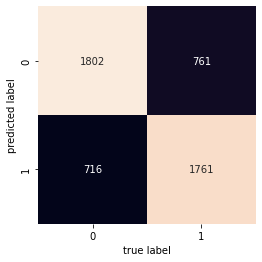

In [23]:
%%time

try:
    LogReg = classificador(x_treino,
                        y_treino,
                        x_teste,
                        y_teste)

except Exception as error:
    logger.warning('Aconteceu algum problema...')
    logger.critical(error)

else:
    logger.info('Ok')
    
finally:
    logger.info('Treino finalizado')

---

#### Exportando modelo

In [25]:
pkl.dump(LogReg, open('modelos/REG_LOG_dados_FEM_MAS_10_voluntarios_s_semanas_15_sinais_noout.pkl', 'wb'))